# Теория

Линейная регрессия — метод восстановления зависимости между двумя переменными.

Для заданного множества из m пар ($x_{i}$, $y_{i}$), $i=1,..., m$, значений свободной и зависимой переменной требуется построить линейную зависимость:

$y_{i} =  f({w}, x_{i}) + \varepsilon_{i}$

Определим модель зависимости как:

$y_i= w_0 + w_1x_i + ...+ w_mx_m + \varepsilon_i$

В матричном виде:
$Y = XW + \varepsilon$

Y - зависимая переменная (отклик)
X - независимая ошибка (предиктор)
$\varepsilon_{i}$ - ошибка (невязка)

Наша задача состоит в поиске w.

Согласно методу наименьнах квадратов, искомый вектор параметров $w = (w1, w2)^T$ есть решение нормального уравнения

$w = (A^TA)^{-1}A^Ty$, где

$y = (y_1,...,y_m)

Матрица A имеет вид 

$\left(\begin{array}{ccc}1 & x_1  \\  1 & x_2  \\  \vdots & \vdots \\  1 & x_m \\ \end{array}\right)$

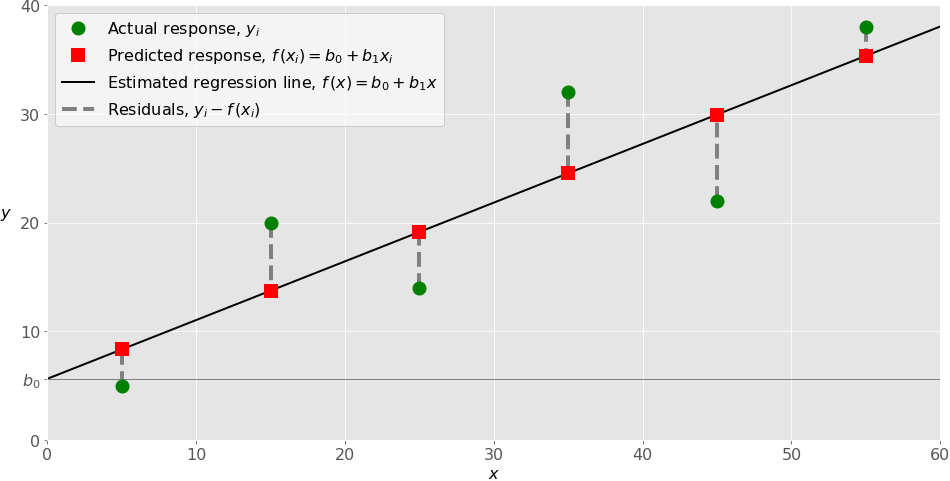

## Критерии качества
### SSE — Sum of Squared Errors

$SSE = \sum_{i=1}^m(y_i-y_i^*)^2 = (\mathbf{y}-\mathbf{y}^*)^T(\mathbf{y}-\mathbf{y}^*)$


### MSE - Mean squared error

$MSE = \frac{1}{n}\sum_{i=1}^m(y_i-y_i^*)^2 = (\mathbf{y}-\mathbf{y}^*)^T(\mathbf{y}-\mathbf{y}^*)$

$MSE = SSE/n$

### MAD - Mean absolute deviation

### Коэффициент детерминации

$R^2=\frac {\frac{1}{n}\sum_{i=1}^m(y_i-y_i^*)^2} {\frac{1}{n}\sum_{i=1}^m(y_i-y_n^-)^2}$


## Квартет Эскомба
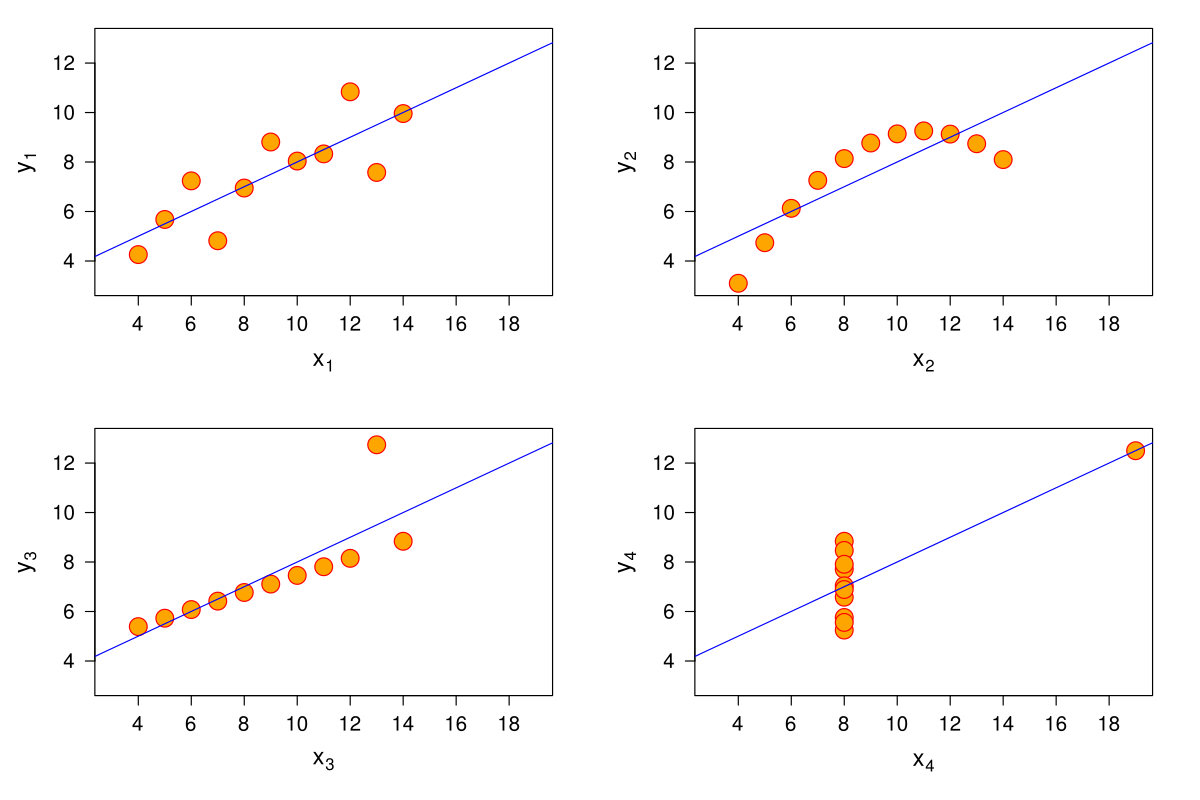

## Коллинеарность
Допустим, дана зависимость
    Z = 6X + 8Y + 5

Одновременно известно, что 
    Y = 2X
    
Тогда верно:

Z = 2X + 10Y + 5

Z = 22X + 0Y + 5

Z = 0X + 11Y + 5

И так далее...
 


## tolerance

$tolerance = 1 - R^2_j$

Пороговые значения 0,1 или 0,2





Примеры
===========

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

### Предсказание цены домов

In [2]:
df = pd.read_csv('Albuquerque Home Prices.txt', sep='\t')
df = df.replace(-9999, np.nan)

In [3]:
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.0,7,1,1,0,1639.0
1,2080,2600,NaN,4,1,1,0,1088.0
2,2150,2664,6.0,5,1,1,0,1193.0
3,2150,2921,3.0,6,1,1,0,1635.0
4,1999,2580,4.0,4,1,1,0,1732.0


Прежде, чем строить модель, нужно решить вопрос с пропущенными значениями. Сначала посчитаем, сколько строчек их содержат.

In [4]:
print('Rows in the data frame: {0}'.format(len(df)))
print('Rows without NAN: {0}'.format(len(df.dropna(how='any'))))

Rows in the data frame: 117
Rows without NAN: 66


Таким образом, около половины наших данных содержат хотя бы одно пропущенное значение. Учитывая то, что данных относительно мало, выбрасывать все такие строчки, было бы слишком расточительно.

Попробуем копнуть глубже и посмотреть на распределение пропущенных значений по колонкам.

Функция ```DataFrame.apply``` применяет указанную функцию ко всей таблице. Первый аргумент -- применяемая функция, второй аргумент -- направление её применения (0 -- применить к колонкам, 1 -- ко строчкам).

In [5]:
df.apply(lambda x: sum(x.isnull()), axis=0)

PRICE     0
SQFT      0
AGE      49
FEATS     0
NE        0
CUST      0
COR       0
TAX      10
dtype: int64

Для определения функции здесь использовано так называемое лямбда-выражение (лямбда-функция). Это способ записать короткую функцию в одну строчку, не задавая её имени. В данном случае такое лямбда-выражение эквивалентно следующему определению функции:

`
def f(x):
    return sum(x.isnull())
`

Таким образом, видим, что источниками пропущенных значений являются колонки ```AGE``` и ```TAX```. Раз в колонке ```AGE``` так много пропусков, то проще её будет убрать из анализа, чем пытаться заделать эти дырки.

In [6]:
del df['AGE']

А колонку ```TAX``` можно попробовать починить. Чтобы это сделать, сначала посмотрим, как выглядит распределение этой колонки.

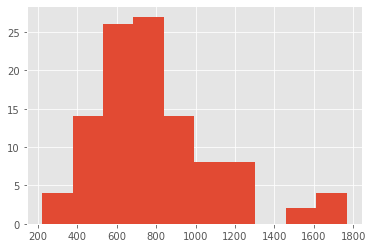

In [7]:
df['TAX'].hist()

Раз распределение похоже на нормальное, то можно заменить пропуски на среднее значение этой колонки. Для этого в pandas есть функция ```Series.fillna```, которая заменяет все пропущенные в колонке значения на заданное.

In [8]:
df['TAX'] = df['TAX'].fillna(df['TAX'].mean())

Убедимся, что все проблемы с пропусками устранены. Длина таблицы с пропусками равна длине исходного датасета.

In [9]:
len(df.dropna())

117

#### Построение модели

Теперь можно переходить непосредственно к построению модели.

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
X = df.drop('PRICE', axis=1)
y = df['PRICE']

In [12]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

Считаем качество модели (коэффициент $R^2$).

In [13]:
print('R^2: {0}'.format(model.score(X, y)))

R^2: 0.8022436103807493


Выведем регрессионные коэффициенты от метода ```model.coef_``` и свободный член от метода ```model.intercept_```.

In [14]:
coef = pd.DataFrame(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist()),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,83.175919
1,SQFT,0.291978
2,FEATS,12.176743
3,NE,8.011604
4,CUST,133.014342
5,COR,-65.800841
6,TAX,0.541942


К сожалению, в ```sklearn``` не предусмотрена процедура определения статистической значимости регрессионных коэффициентов. Поэтому нужно это делать либо руками, вооружившись знанием о распределении коэффициентов, либо воспользовавшись моделью из пакета ```statsmodels```.

In [15]:
from scipy import stats

def regression_coef(model, X, y):
    coef = pd.DataFrame(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist()),
                    columns=['predictor', 'coef'])
    X1 = np.append(np.ones((len(X),1)), X, axis=1)
    b = np.append(model.intercept_, model.coef_)
    MSE = np.sum((model.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
    var_b = MSE * (np.linalg.inv(np.dot(X1.T, X1)).diagonal())
    sd_b = np.sqrt(var_b)
    t = b / sd_b
    coef['pvalue'] = [2 * (1 - stats.t.cdf(np.abs(i), (len(X1) - 1))) for i in t]
    return coef
regression_coef(model, X, y)

,predictor,coef,pvalue
0,intercept,83.175919,1.895059e-01
1,SQFT,0.291978,2.580075e-06
2,FEATS,12.176743,3.419172e-01
3,NE,8.011604,8.190403e-01
4,CUST,133.014342,3.454095e-03
5,COR,-65.800841,1.168611e-01
6,TAX,0.541942,4.972770e-07


Как интерпретировать модель? У нас есть 4 значимых предиктора: ```SQFT```, ```CUST```, ```FEATS``` и ```TAX```.  Значение коэффициента говорит, на сколько вырастет значение сигнала при увеличении предиктора на одну единицу. Смысл первых двух коэффициентов понятен: площадь и специальный вид постройки ожидаемо влияют на цену. Но есть ли смысл включать в предсказание цены дома налог с этого же дома? Ведь налог, как и цена, также начисляется исходя из похожих предикторов. Они должны сильно коррелировать. И действительно. Построим таблицу парных корреляций предикторов.

<bound method DataFrame.corr of      PRICE  SQFT  FEATS  NE  CUST  COR     TAX
0     2050  2650      7   1     1    0  1639.0
1     2080  2600      4   1     1    0  1088.0
2     2150  2664      5   1     1    0  1193.0
3     2150  2921      6   1     1    0  1635.0
4     1999  2580      4   1     1    0  1732.0
..     ...   ...    ...  ..   ...  ...     ...
112    872  1229      3   0     0    0   721.0
113    870  1273      4   0     0    0   638.0
114    869  1165      4   0     0    0   694.0
115    766  1200      4   0     0    1   634.0
116    739   970      4   0     0    1   541.0

[117 rows x 7 columns]>


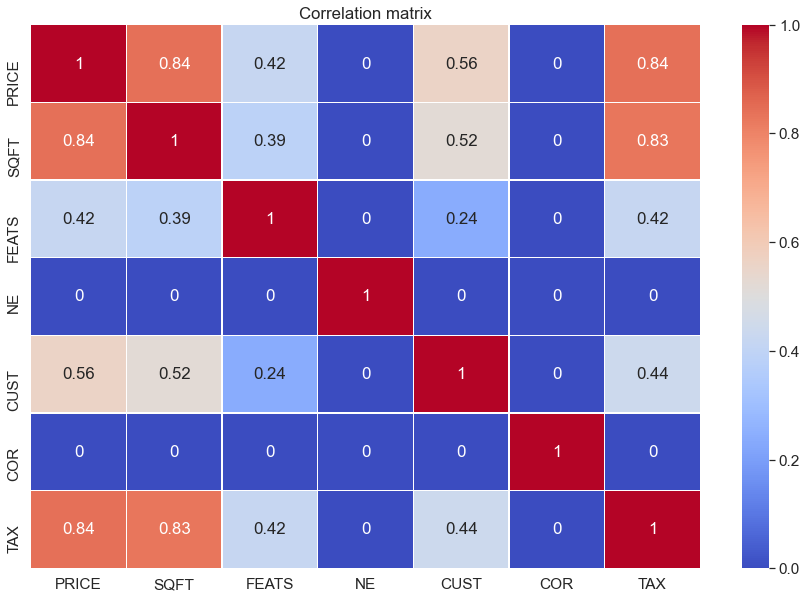

In [16]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
print(df.corr)
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.2] = 0  # Проверьте, что будет если убрать маленькие корреляции

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()


Налоги сильно коррелируют с площадью. Предлагается откинуть налоги.

In [17]:
X = df[['SQFT', 'CUST', 'FEATS']]
model.fit(X, y)
print (model.score(X, y))
regression_coef(model, X, y)

0.7398546894225255


,predictor,coef,pvalue
0,intercept,65.959766,0.345472
1,SQFT,0.527919,0.000000
2,CUST,138.534915,0.006877
3,FEATS,25.979118,0.067760


## Полиномиальная регрессия


In [18]:
df = pd.read_csv('diamond.dat', header=None, sep='\s+', names=['weight', 'price'])

In [19]:
df.head()

,weight,price
0,0.17,355
1,0.16,328
2,0.17,350
3,0.18,325
4,0.25,642


Будем предсказывать цену кольца с бриллиантом от веса бриллианта. Попробуем предсказать результат не только с помощью самой переменной, но и с помощью её степеней. Первая модель будет зависеть только от самой переменной ```weight```, вторая -- от переменной ```weight^2```, а третья -- от двух этих переменных сразу.

В этих случаях, когда мы хотим попробовать в качестве фичей их степени и произведения фич, в ```sklearn.preprocessing``` есть класс ```PolynomialFeatures```. Метод ```fit_transform``` этого класса сгенерирует из данного множества фич множество одночленов заданной степени. Например, для степени 2 и фич ```a```, ```b``` будут сгенерированы фичи ```[a, b, a^2, b^2, ab]```, а при указанном параметре ```include_bias=True``` ещё и вектор-свободный член из единиц. Для данной задачи, конечно, проще было сгенерить один столбец из квадратов значений колонки ```weight```. Но нам важно ознакомиться с классом ```PolynomialFeatures``` для дальнейшего применения.

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(
                          # Максимальная степень
                          degree=2,
                          # Не генерировать свободный член
                          include_bias=False)
y = df['price']
X0 = poly.fit_transform(df[['weight']])
X0 = pd.DataFrame(X0, columns=['weight', 'weight^2'])
X0.head()

,weight,weight^2
0,0.17,0.0289
1,0.16,0.0256
2,0.17,0.0289
3,0.18,0.0324
4,0.25,0.0625


In [21]:
X0 = [
    # Одна оригинальная переменная weight
    X0[['weight']],
    # Одна переменная weight^2
    X0[['weight^2']],
    # Две переменных: weight и weight^2
    X0.copy()]
models = [LinearRegression() for _ in X0]

In [22]:
for X, model in zip(X0, models):
    model.fit(X, y)
    print(model.score(X, y))

0.978260777986033
0.970310818417109
0.9789175801893899


Получилось, что $R^2$ во всех моделях примерно одинаков. Однако не все они одинаково полезны. 

## p-value
— это вероятность получить такие или более выраженные различия при условии, что в генеральной совокупности никаких различий на самом деле нет. 

In [23]:
regression_coef(models[0], X0[0], y)

,predictor,coef,pvalue
0,intercept,-259.625907,0.0
1,weight,3721.024852,0.0


In [24]:
regression_coef(models[1], X0[1], y)

,predictor,coef,pvalue
0,intercept,141.659045,0.0
1,weight^2,7993.108083,0.0


In [25]:
regression_coef(models[2], X0[2], y)

,predictor,coef,pvalue
0,intercept,-174.130082,0.021866
1,weight,2920.130591,0.000077
2,weight^2,1739.901579,0.237265


In [26]:
import statsmodels.api as sm
X2 = sm.add_constant(X0[2])
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1045.
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           1.94e-38
Time:                        05:54:26   Log-Likelihood:                -232.47
No. Observations:                  48   AIC:                             470.9
Df Residuals:                      45   BIC:                             476.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -174.1301     74.238     -2.346      0.0